In [1]:
import torch
torch.cuda.set_device(6)
print(torch.cuda.current_device())

6


In [2]:
%run ../../prepare_data.py
%run ../../architectures.py

In [3]:
batch_size = 32

In [4]:
train_loader, valid_loader, valid_dataset = get_chexpert_dataloaders(batch_size)

In [5]:
x, y = next(iter(train_loader))

In [6]:
x.shape, y.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32, 5]))

In [7]:
model = MobileNet(num_classes=5, width_mult=1.0, depth_mult=1.0).cuda()

In [8]:
sum(p.numel() for p in model.parameters())

2230277

CPU times: user 1min 26s, sys: 8.38 s, total: 1min 34s
Wall time: 1min 35s


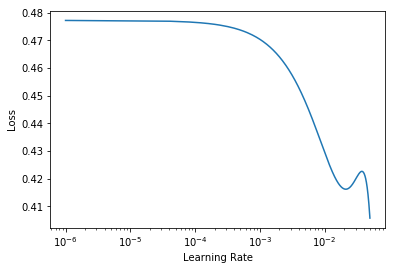

In [9]:
%%time
lrs, losses = LR_range_finder(model, train_loader, 
                              loss_fn=F.binary_cross_entropy_with_logits, 
                              binary=False, lr_high=0.05)
plot_lr(lrs, losses)

# Training

In [11]:
widths = [1.0, 0.75, 0.5, 0.25]
depths = [1.0, 0.7, 0.6, 0.5, 0.3, 0.2]

In [13]:
data = []
d = 1.0

for w in widths:
#     for d in depths:
    print('width multiplier - %.3f depth multiplier - %.3f' % (w, d))
    model = MobileNet(num_classes=5,width_mult=w, depth_mult=d).cuda()
    p = sum(p.numel() for p in model.parameters())
    optimizer = create_optimizer(model, 0.001)
    score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                       loss_fn=F.binary_cross_entropy_with_logits, 
                                       dataset='chexpert', binary=False, max_lr=0.001, epochs=15)
    data.append([w, d, score, p, t])
    print('')

width multiplier - 1.000 depth multiplier - 1.000
train_loss 0.427 val_loss 0.435 val_auc_score 0.569
----End of step 0:01:44.103960
train_loss 0.420 val_loss 0.424 val_auc_score 0.611
----End of step 0:01:44.294860
train_loss 0.413 val_loss 0.420 val_auc_score 0.630
----End of step 0:01:44.873700
train_loss 0.406 val_loss 0.416 val_auc_score 0.633
----End of step 0:01:45.652851
train_loss 0.400 val_loss 0.418 val_auc_score 0.645
----End of step 0:01:45.445690
train_loss 0.395 val_loss 0.411 val_auc_score 0.659
----End of step 0:01:45.237801
train_loss 0.390 val_loss 0.414 val_auc_score 0.649
----End of step 0:01:45.163446
train_loss 0.386 val_loss 0.409 val_auc_score 0.655
----End of step 0:01:45.195314
train_loss 0.382 val_loss 0.397 val_auc_score 0.687
----End of step 0:01:45.326736
train_loss 0.378 val_loss 0.397 val_auc_score 0.685
----End of step 0:01:45.162718
train_loss 0.376 val_loss 0.392 val_auc_score 0.692
----End of step 0:01:45.663486
train_loss 0.373 val_loss 0.394 val_a

In [19]:
data

[[1.0,
  1.0,
  0.6971991207952705,
  2230277,
  datetime.timedelta(seconds=106, microseconds=164389)],
 [0.75,
  1.0,
  0.6886364433978219,
  1353373,
  datetime.timedelta(seconds=103, microseconds=174532)],
 [0.5,
  1.0,
  0.6702295864375458,
  690853,
  datetime.timedelta(seconds=105, microseconds=417707)],
 [0.25,
  1.0,
  0.6500565009921415,
  242717,
  datetime.timedelta(seconds=105, microseconds=232095)]]

In [20]:
d = 0.7

for w in widths:
#     for d in depths:
    print('width multiplier - %.3f depth multiplier - %.3f' % (w, d))
    model = MobileNet(num_classes=5,width_mult=w, depth_mult=d).cuda()
    p = sum(p.numel() for p in model.parameters())
    optimizer = create_optimizer(model, 0.001)
    score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                       loss_fn=F.binary_cross_entropy_with_logits, 
                                       dataset='chexpert', binary=False, max_lr=0.001, epochs=15)
    data.append([w, d, score, p, t])
    print('')

width multiplier - 1.000 depth multiplier - 0.700
train_loss 0.427 val_loss 0.438 val_auc_score 0.577
----End of step 0:01:40.933116
train_loss 0.416 val_loss 0.428 val_auc_score 0.611
----End of step 0:01:41.279703
train_loss 0.410 val_loss 0.424 val_auc_score 0.625
----End of step 0:01:43.538065
train_loss 0.405 val_loss 0.415 val_auc_score 0.640
----End of step 0:01:42.085308
train_loss 0.399 val_loss 0.410 val_auc_score 0.657
----End of step 0:01:44.114330
train_loss 0.394 val_loss 0.408 val_auc_score 0.663
----End of step 0:01:43.446975
train_loss 0.390 val_loss 0.406 val_auc_score 0.659
----End of step 0:01:43.677292
train_loss 0.386 val_loss 0.405 val_auc_score 0.671
----End of step 0:01:44.038716
train_loss 0.382 val_loss 0.401 val_auc_score 0.678
----End of step 0:01:45.801393
train_loss 0.378 val_loss 0.394 val_auc_score 0.691
----End of step 0:01:49.139231
train_loss 0.376 val_loss 0.397 val_auc_score 0.690
----End of step 0:01:52.244221
train_loss 0.374 val_loss 0.393 val_a

In [21]:
data

[[1.0,
  1.0,
  0.6971991207952705,
  2230277,
  datetime.timedelta(seconds=106, microseconds=164389)],
 [0.75,
  1.0,
  0.6886364433978219,
  1353373,
  datetime.timedelta(seconds=103, microseconds=174532)],
 [0.5,
  1.0,
  0.6702295864375458,
  690853,
  datetime.timedelta(seconds=105, microseconds=417707)],
 [0.25,
  1.0,
  0.6500565009921415,
  242717,
  datetime.timedelta(seconds=105, microseconds=232095)],
 [1.0,
  0.7,
  0.6966568743445967,
  2176005,
  datetime.timedelta(seconds=114, microseconds=469143)],
 [0.75,
  0.7,
  0.6890028684475105,
  1321885,
  datetime.timedelta(seconds=105, microseconds=626181)],
 [0.5,
  0.7,
  0.6762539552376621,
  676005,
  datetime.timedelta(seconds=107, microseconds=715770)],
 [0.25,
  0.7,
  0.6534971727047003,
  238365,
  datetime.timedelta(seconds=105, microseconds=811608)]]

In [ ]:
d = 0.6

for w in widths:
#     for d in depths:
    print('width multiplier - %.3f depth multiplier - %.3f' % (w, d))
    model = MobileNet(num_classes=5,width_mult=w, depth_mult=d).cuda()
    p = sum(p.numel() for p in model.parameters())
    optimizer = create_optimizer(model, 0.001)
    score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                       loss_fn=F.binary_cross_entropy_with_logits, 
                                       dataset='chexpert', binary=False, max_lr=0.001, epochs=15)
    data.append([w, d, score, p, t])
    print('')

width multiplier - 1.000 depth multiplier - 0.600
train_loss 0.425 val_loss 0.433 val_auc_score 0.588
----End of step 0:01:31.034952
train_loss 0.417 val_loss 0.426 val_auc_score 0.591
----End of step 0:01:31.582724
train_loss 0.411 val_loss 0.421 val_auc_score 0.625
----End of step 0:01:33.112747
train_loss 0.404 val_loss 0.411 val_auc_score 0.647
----End of step 0:01:34.136000
train_loss 0.398 val_loss 0.415 val_auc_score 0.641
----End of step 0:01:33.982062
train_loss 0.393 val_loss 0.412 val_auc_score 0.661
----End of step 0:01:32.858315
train_loss 0.389 val_loss 0.403 val_auc_score 0.672
----End of step 0:01:33.912574
train_loss 0.386 val_loss 0.409 val_auc_score 0.662
----End of step 0:01:34.895450


In [ ]:
data

In [ ]:
d = 0.5

for w in widths:
#     for d in depths:
    print('width multiplier - %.3f depth multiplier - %.3f' % (w, d))
    model = MobileNet(num_classes=5,width_mult=w, depth_mult=d).cuda()
    p = sum(p.numel() for p in model.parameters())
    optimizer = create_optimizer(model, 0.001)
    score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                       loss_fn=F.binary_cross_entropy_with_logits, 
                                       dataset='chexpert', binary=False, max_lr=0.001, epochs=15)
    data.append([w, d, score, p, t])
    print('')

In [ ]:
data

In [ ]:
d = 0.3

for w in widths:
#     for d in depths:
    print('width multiplier - %.3f depth multiplier - %.3f' % (w, d))
    model = MobileNet(num_classes=5,width_mult=w, depth_mult=d).cuda()
    p = sum(p.numel() for p in model.parameters())
    optimizer = create_optimizer(model, 0.001)
    score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                       loss_fn=F.binary_cross_entropy_with_logits, 
                                       dataset='chexpert', binary=False, max_lr=0.001, epochs=15)
    data.append([w, d, score, p, t])
    print('')

In [ ]:
data

In [ ]:
d = 0.2

for w in widths:
#     for d in depths:
    print('width multiplier - %.3f depth multiplier - %.3f' % (w, d))
    model = MobileNet(num_classes=5,width_mult=w, depth_mult=d).cuda()
    p = sum(p.numel() for p in model.parameters())
    optimizer = create_optimizer(model, 0.001)
    score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                       loss_fn=F.binary_cross_entropy_with_logits, 
                                       dataset='chexpert', binary=False, max_lr=0.001, epochs=15)
    data.append([w, d, score, p, t])
    print('')

In [ ]:
data

In [ ]:
columns = ['width_x', 'depth_x', 'val_score', 'params', 'time_per_epoch']
df = pd.DataFrame(data=data, columns=columns)

In [ ]:
df.to_csv("chexpert_mobilenet.csv", index=False)

In [ ]:
df_re = pd.read_csv('chexpert_mobilenet.csv')

In [ ]:
df_re.head()